In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [11]:
data_path = "../raw_data/dynamism_data/bds2022_sec.csv"
merged = pd.read_csv(data_path)

In [12]:
merged = merged.rename(columns={'sector': 'NAICS'})

In [13]:
merged['firms_percent_destroyed'] = (merged['firmdeath_firms'] / merged['firms']) * 100

In [14]:
merged.columns

Index(['year', 'NAICS', 'firms', 'estabs', 'emp', 'denom', 'estabs_entry',
       'estabs_entry_rate', 'estabs_exit', 'estabs_exit_rate', 'job_creation',
       'job_creation_births', 'job_creation_continuers',
       'job_creation_rate_births', 'job_creation_rate', 'job_destruction',
       'job_destruction_deaths', 'job_destruction_continuers',
       'job_destruction_rate_deaths', 'job_destruction_rate',
       'net_job_creation', 'net_job_creation_rate', 'reallocation_rate',
       'firmdeath_firms', 'firmdeath_estabs', 'firmdeath_emp',
       'firms_percent_destroyed'],
      dtype='object')

In [15]:
vars = [
    'job_creation_rate',
    'job_destruction_rate',
    'reallocation_rate', 
    'estabs_entry_rate', 
    'estabs_exit_rate', 
    'firms_percent_destroyed'
]

for var in vars:
    merged[f'{var}_3yr_avg'] = (
        merged
          .sort_values(['NAICS','year'])
          .groupby('NAICS')[var]
          .rolling(window=3, min_periods=1, center=True)
          .mean()
          .reset_index(level=0, drop=True)
    )

In [16]:
df_plot = (
    merged
      .groupby('year')[ 'job_creation_rate_3yr_avg' ]
      .mean()
      .reset_index()
)

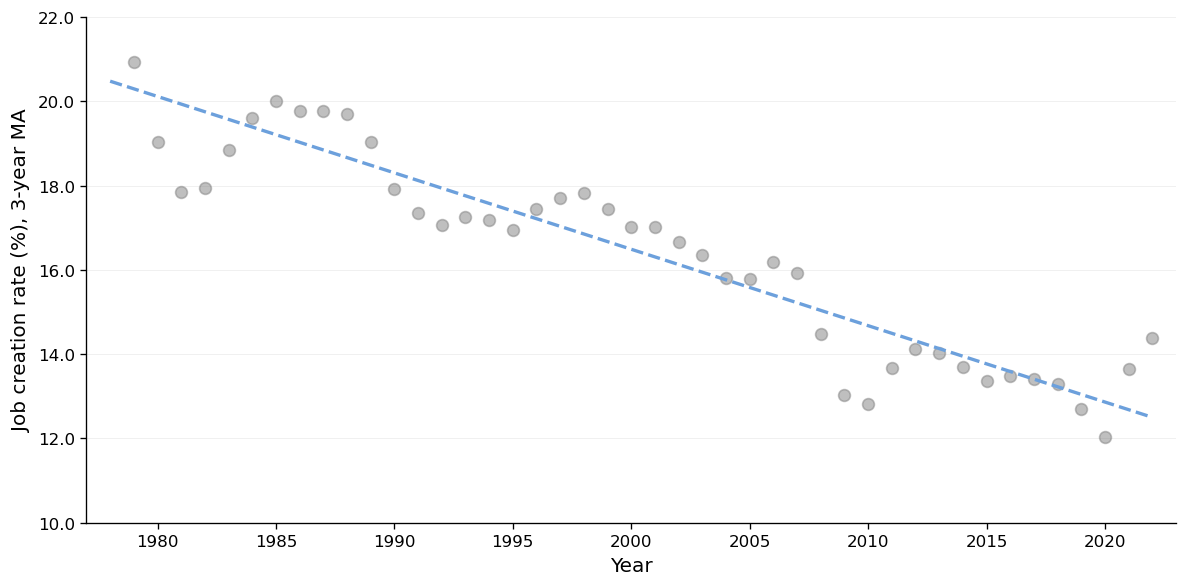

In [17]:
X = df_plot[['year']].values
y = df_plot['job_creation_rate_3yr_avg'].values
model = LinearRegression().fit(X, y)
y_trend = model.predict(X)

plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5), dpi=120)
ax.set_facecolor('white')

ax.scatter(
    df_plot['year'],
    y,
    s=50,
    color='grey',
    alpha=0.5,
)

ax.plot(
    df_plot['year'],
    y_trend,
    linestyle='--',
    linewidth=2,
    color='#6CA0DC',
)

min_year = df_plot['year'].min()
max_year = df_plot['year'].max()
start_year = min_year - (min_year % 5)
if start_year < min_year:
    start_year += 5
    
x_ticks = range(start_year, max_year + 6, 5)

ax.set_xticks(x_ticks)
ax.set_ylim(10, 22)
y_ticks = range(10, 24, 2) 
ax.set_yticks(y_ticks)
ax.yaxis.set_major_formatter('{x:.1f}') 
ax.set_xlim(min_year - 1, max_year + 1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8) 
ax.spines['bottom'].set_linewidth(0.8)  

ax.grid(which='major', axis='y', linestyle='-', linewidth=0.4, color='#E0E0E0', alpha=0.7)
ax.set_axisbelow(True) 

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Job creation rate (%), 3-year MA', fontsize=12)

ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig('../figures/job_creation_rate_trend.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
df_plot = (
    merged
      .groupby('year')[ 'job_destruction_rate_3yr_avg' ]
      .mean()
      .reset_index()
)

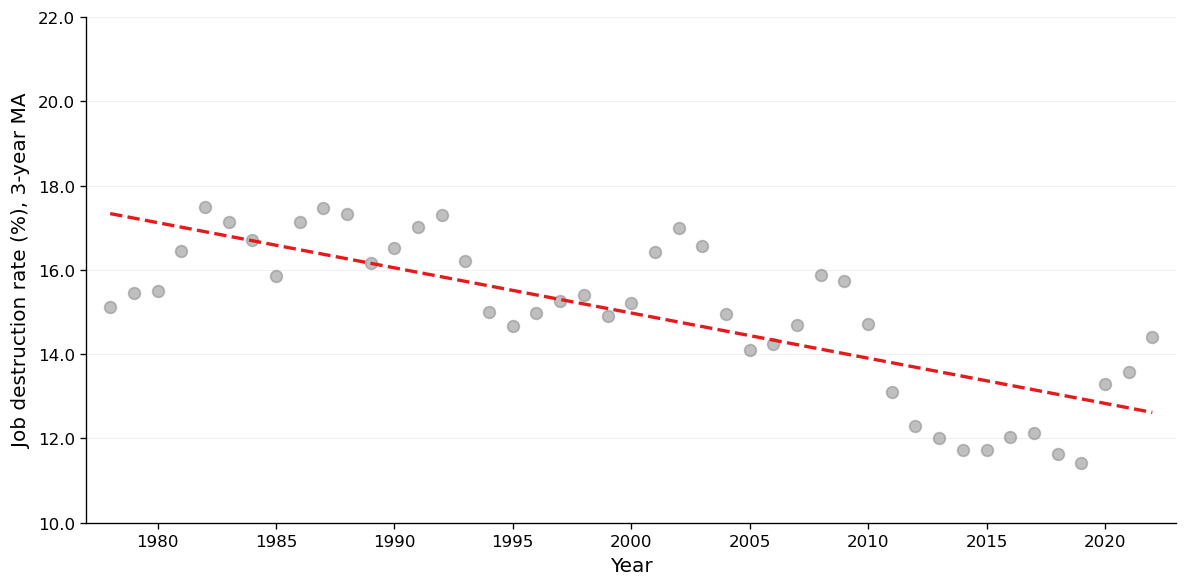

In [19]:
X = df_plot[['year']].values
y = df_plot['job_destruction_rate_3yr_avg'].values
model = LinearRegression().fit(X, y)
y_trend = model.predict(X)

plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5), dpi=120)
ax.set_facecolor('white')

ax.scatter(
    df_plot['year'],
    y,
    s=50,
    color='grey',
    alpha=0.5,
)

# 4) Plot the trend line in red (no markers)
ax.plot(
    df_plot['year'],
    y_trend,
    linestyle='--',
    linewidth=2,
    color='#E41A1C',  # Keep the red color for destruction rate
)

# 5) Properly set x-ticks to avoid broken years
min_year = df_plot['year'].min()
max_year = df_plot['year'].max()
start_year = min_year - (min_year % 5)
if start_year < min_year:
    start_year += 5
x_ticks = range(start_year, max_year + 6, 5)
ax.set_xticks(x_ticks)

# 6) UPDATED: Fixed y-axis limits from 10 to 22
ax.set_ylim(10, 22)

# 7) UPDATED: Fixed y-ticks with increments of 2
y_ticks = range(10, 24, 2)  # 10, 12, 14, 16, 18, 20, 22
ax.set_yticks(y_ticks)
ax.yaxis.set_major_formatter('{x:.1f}')  # show one decimal place

# 8) Set appropriate x-axis limits to avoid cutoff
ax.set_xlim(min_year - 1, max_year + 1)

# 9) Single-axis "spine" style
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)  # Slightly thinner left spine
ax.spines['bottom'].set_linewidth(0.8)  # Slightly thinner bottom spine

# 10) Lighter, thinner horizontal gridlines only
ax.grid(which='major', axis='y', linestyle='-', linewidth=0.4, color='#E0E0E0', alpha=0.7)
ax.set_axisbelow(True)  # Ensure grid is behind data

# 11) Labels only on the axes (no title, no legend)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Job destruction rate (%), 3-year MA', fontsize=12)

# 12) Ensure tick labels are clean and properly sized
ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig('../figures/job_destruction_rate_trend.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
df_plot = (
    merged
      .groupby('year')[ 'reallocation_rate_3yr_avg' ]
      .mean()
      .reset_index()
)

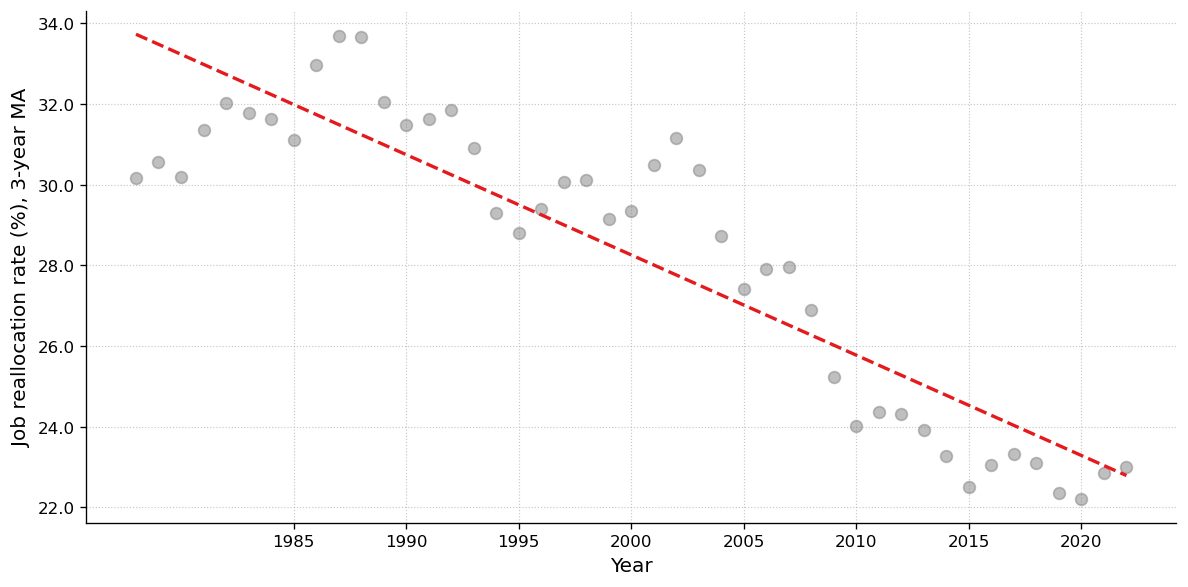

In [21]:
X = df_plot[['year']].values
y = df_plot['reallocation_rate_3yr_avg'].values
model = LinearRegression().fit(X, y)
y_trend = model.predict(X)

plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5), dpi=120)
ax.set_facecolor('white')

ax.scatter(
    df_plot['year'],
    y,
    s=50,
    color='grey',
    alpha=0.5,
)

ax.plot(
    df_plot['year'],
    y_trend,
    linestyle='--',
    linewidth=2,
    color='#E41A1C')

y_min = np.floor(y.min())
y_max = np.ceil(y.max())
y_range = y_max - y_min
 
if y_range <= 5:
    tick_spacing = 0.5  # For small ranges
elif y_range <= 10:
    tick_spacing = 1.0  # For medium ranges
else:
    tick_spacing = 2.0  # For large ranges

y_ticks = np.arange(y_min, y_max + tick_spacing, tick_spacing)
ax.set_yticks(y_ticks)
ax.yaxis.set_major_formatter('{x:.1f}')  # show one decimal place

ax.set_xticks(range(1985, df_plot['year'].max()+1, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(which='major', linestyle=':', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Job reallocation rate (%), 3-year MA', fontsize=12)

plt.tight_layout()
plt.savefig('../figures/job_reallocation_rate_trend.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
print(merged.columns)

Index(['year', 'NAICS', 'firms', 'estabs', 'emp', 'denom', 'estabs_entry',
       'estabs_entry_rate', 'estabs_exit', 'estabs_exit_rate', 'job_creation',
       'job_creation_births', 'job_creation_continuers',
       'job_creation_rate_births', 'job_creation_rate', 'job_destruction',
       'job_destruction_deaths', 'job_destruction_continuers',
       'job_destruction_rate_deaths', 'job_destruction_rate',
       'net_job_creation', 'net_job_creation_rate', 'reallocation_rate',
       'firmdeath_firms', 'firmdeath_estabs', 'firmdeath_emp',
       'firms_percent_destroyed', 'job_creation_rate_3yr_avg',
       'job_destruction_rate_3yr_avg', 'reallocation_rate_3yr_avg',
       'estabs_entry_rate_3yr_avg', 'estabs_exit_rate_3yr_avg',
       'firms_percent_destroyed_3yr_avg'],
      dtype='object')


In [23]:
df_plot = (
    merged
    .groupby('year')
    .agg({
        'estabs_exit_rate_3yr_avg': 'mean'  # or the appropriate column name for firm death rate
    })
    .reset_index()
)

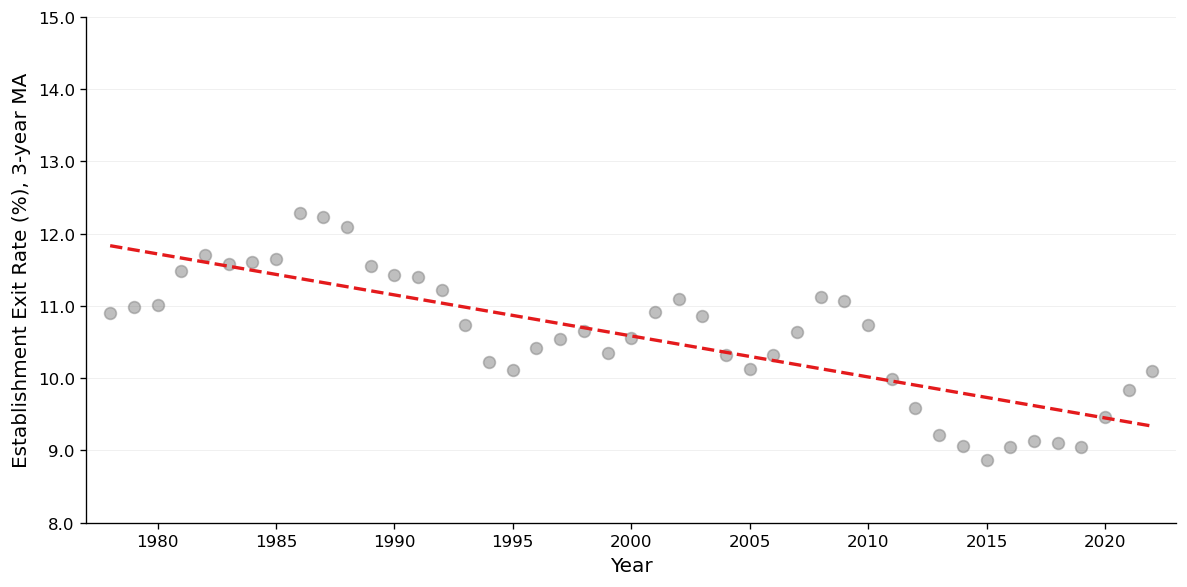

In [25]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5), dpi=120)
ax.set_facecolor('white')

X = df_plot[['year']].values
years = df_plot['year']

ax.scatter(
    years,
    df_plot['estabs_exit_rate_3yr_avg'],
    s=50,
    color='grey',
    alpha=0.5
)

y_estab = df_plot['estabs_exit_rate_3yr_avg'].values
model_estab = LinearRegression().fit(X, y_estab)
y_estab_trend = model_estab.predict(X)

ax.plot(
    years,
    y_estab_trend,
    linestyle='--',
    linewidth=2,
    color='#E41A1C'  
)

min_year = min(years)
max_year = max(years)

start_year = 1980
x_ticks = range(start_year, max_year + 6, 5)
ax.set_xticks(x_ticks)
ax.set_xlim(min_year - 1, max_year + 1) 
ax.set_ylim(8, 15)

y_ticks = np.arange(8, 15.1, 1.0) 
ax.set_yticks(y_ticks)
ax.yaxis.set_major_formatter('{x:.1f}')  

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Establishment Exit Rate (%), 3-year MA', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8) 
ax.spines['bottom'].set_linewidth(0.8) 
ax.grid(which='major', axis='y', linestyle='-', linewidth=0.4, color='#E0E0E0', alpha=0.7)
ax.set_axisbelow(True) 
ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig('../figures/estabs_exit_rate_trend.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
df_plot = (
    merged
    .groupby('year')
    .agg({
        'estabs_entry_rate_3yr_avg': 'mean'  # or the appropriate column name for firm death rate
    })
    .reset_index()
)

In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5), dpi=120)
ax.set_facecolor('white')

X = df_plot[['year']].values
years = df_plot['year']

ax.scatter(
    years,
    df_plot['estabs_entry_rate_3yr_avg'],
    s=50,
    color='grey',
    alpha=0.5
)

y_estab = df_plot['estabs_entry_rate_3yr_avg'].values
model_estab = LinearRegression().fit(X, y_estab)
y_estab_trend = model_estab.predict(X)

ax.plot(
    years,
    y_estab_trend,
    linestyle='--',
    linewidth=2,
    color='#6CA0DC'
)

min_year = min(years)
max_year = max(years)

start_year = 1980
x_ticks = range(start_year, max_year + 6, 5)
ax.set_xticks(x_ticks)
ax.set_xlim(min_year - 1, max_year + 1)  

ax.set_ylim(8, 15)

y_ticks = np.arange(8, 15.1, 1.0)  # 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0
ax.set_yticks(y_ticks)
ax.yaxis.set_major_formatter('{x:.1f}') 

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Establishment Entry Rate (%), 3-year MA', fontsize=12)

# Improve spine appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

# Improve gridlines (lighter, horizontal only)
ax.grid(which='major', axis='y', linestyle='-', linewidth=0.4, color='#E0E0E0', alpha=0.7)
ax.set_axisbelow(True)

ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig('../figures/estabs_entry_rate_trend.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
df_plot = (
    merged
    .groupby('year')
    .agg({
        'firms_percent_destroyed_3yr_avg': 'mean'  # or the appropriate column name for firm death rate
    })
    .reset_index()
)

In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5), dpi=120)
ax.set_facecolor('white')

X = df_plot[['year']].values
years = df_plot['year']

ax.scatter(
    years,
    df_plot['firms_percent_destroyed_3yr_avg'],
    s=50,
    color='grey',
    alpha=0.5
)

y_firm = df_plot['firms_percent_destroyed_3yr_avg'].values
model_firm = LinearRegression().fit(X, y_firm)
y_firm_trend = model_firm.predict(X)

ax.plot(
    years,
    y_firm_trend,
    linestyle='--',
    linewidth=2,
    color='#E41A1C' 
)

min_year = min(years)
max_year = max(years)

start_year = 1980
x_ticks = range(start_year, max_year + 6, 5)
ax.set_xticks(x_ticks)
ax.set_xlim(min_year - 1, max_year + 1)  

ax.set_ylim(6, 14)

y_ticks = np.arange(6, 14.1, 1.0)  
ax.set_yticks(y_ticks)
ax.yaxis.set_major_formatter('{x:.1f}')  

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Firm Death Rate (%), 3-year MA', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)  
ax.spines['bottom'].set_linewidth(0.8) 

ax.grid(which='major', axis='y', linestyle='-', linewidth=0.4, color='#E0E0E0', alpha=0.7)
ax.set_axisbelow(True)  # Ensure grid is behind data


ax.tick_params(axis='both', which='major', labelsize=10)


plt.tight_layout()
plt.savefig('../figures/firm_death_rate_trend.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
data_path = "../raw_data/dynamism_data/new_firms_df.csv"
new_firms = pd.read_csv(data_path)

In [ ]:

new_firms['new_firm_rate_3yr_avg'] = (
    new_firms
    .sort_values('year')
    .new_firm_rate
    .rolling(window=3, min_periods=1, center=True)
    .mean()
)

X = new_firms[['year']].values
y = new_firms['new_firm_rate_3yr_avg'].values

model = LinearRegression().fit(X, y)
y_trend = model.predict(X)

plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5), dpi=120)
ax.set_facecolor('white')

ax.scatter(
    new_firms['year'],
    y,
    s=50,
    color='grey',
    alpha=0.5,
)

ax.plot(
    new_firms['year'],
    y_trend,
    linestyle='--',
    linewidth=2,
    color='#6CA0DC',
)

min_year = new_firms['year'].min()
max_year = new_firms['year'].max()

start_year = 1980
x_ticks = range(start_year, int(max_year) + 6, 5)
ax.set_xticks(x_ticks)
ax.set_xlim(min_year - 1, max_year + 1)  # Add padding

ax.set_ylim(6, 14)

y_ticks = np.arange(6, 14.1, 1.0) 
ax.set_yticks(y_ticks)
ax.yaxis.set_major_formatter('{x:.1f}')  

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)  
ax.spines['bottom'].set_linewidth(0.8)  

ax.grid(which='major', axis='y', linestyle='-', linewidth=0.4, color='#E0E0E0', alpha=0.7)
ax.set_axisbelow(True)  

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Firm birth rate (%), 3-year MA', fontsize=12)

ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig('../figures/firm_birth_rate_trend.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
vars = [
    'job_creation_rate',
    'job_destruction_rate',
    'reallocation_rate', 
    'estabs_entry_rate', 
    'estabs_exit_rate', 
    'firms_percent_destroyed'
]

for var in vars:
    merged[f'{var}_2yr_avg'] = (
        merged
          .sort_values(['NAICS','year'])
          .groupby('NAICS')[var]
          .rolling(window=2, min_periods=1, center=True)
          .mean()
          .reset_index(level=0, drop=True)
    )

In [ ]:

def weighted_avg(values, weights):
    values = pd.to_numeric(values, errors='coerce')
    weights = pd.to_numeric(weights, errors='coerce')

    mask = ~(np.isnan(values) | np.isnan(weights))
    values = values[mask]
    weights = weights[mask]
    
    return np.average(values, weights=weights) if len(values) > 0 else np.nan

national = pd.DataFrame()
for year, group in merged.groupby("year"):
    firm_entry = weighted_avg(
        group["job_creation_rate_3yr_avg"], 
        group["weight"]
    )
    estab_entry = weighted_avg(
        group["estabs_entry_rate_3yr_avg"], 
        group["weight"]
    )
    
    national = pd.concat([
        national, 
        pd.DataFrame({
            "year": [year],
            "firm_entry_wt": [firm_entry],
            "estab_entry_wt": [estab_entry]
        })
    ])

national = national.reset_index(drop=True).sort_values("year")

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(
    national["year"],
    national["firm_entry_wt"],
    linestyle="-",  
    linewidth=2.5,
    color="#4993C3",
    label="Firms"
)
ax1.set_ylabel("Firm entry rate (%)", fontsize=11)
ax1.set_xlabel("Year", fontsize=11)

y_min = 8 
y_max = 19 
ax1.set_ylim(y_min, y_max)
ax1.set_xlim(national["year"].min(), national["year"].max())

ax2 = ax1.twinx()
ax2.plot(
    national["year"],
    national["estab_entry_wt"],
    linestyle="--", 
    linewidth=2.5,
    color="#4993C3",  
    label="Establishments"
)
ax2.set_ylabel("Establishment entry rate (%)", fontsize=11)
ax2.set_ylim(y_min, y_max) 

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc="upper right", frameon=False)

ax1.grid(True, linestyle='-', color='lightgray', alpha=0.5)

ax1.spines["top"].set_visible(False)
ax2.spines["top"].set_visible(False)

for spine in ["bottom", "left", "right"]:
    ax1.spines[spine].set_visible(True)
    ax2.spines[spine].set_visible(True)

ax1.set_yticks(range(8, 20, 2))  # 8, 10, 12, 14, 16, 18
ax2.set_yticks(range(8, 20, 2))  # Match left axis

plt.tight_layout()
plt.show()